Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
pandas: 2.2.2
numpy: 1.26.4
matplotlib: 3.9.2
scipy: 1.13.1
sklearn: 1.5.1
NLTK: 3.9.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name_nsi             15403 non-null  object 
 1   price                15403 non-null  int64  
 2   index                5162 non-null   object 
 3   environment          4132 non-null   object 
 4   quality_of_living    4132 non-null   object 
 5   safety               4132 non-null   object 
 6   transport            4132 non-null   object 
 7   services             4132 non-null   object 
 8   relax                4132 non-null   object 
 9   condition            15076 non-null  object 
 10  area                 14687 non-null  object 
 11  energy_costs         980 non-null    float64
 12  provisi

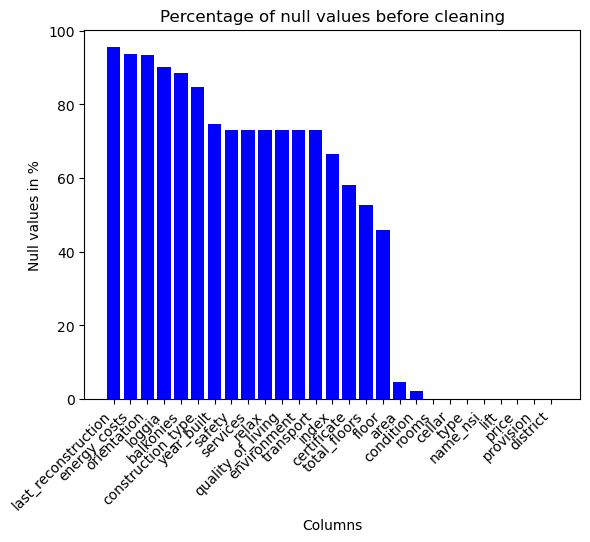

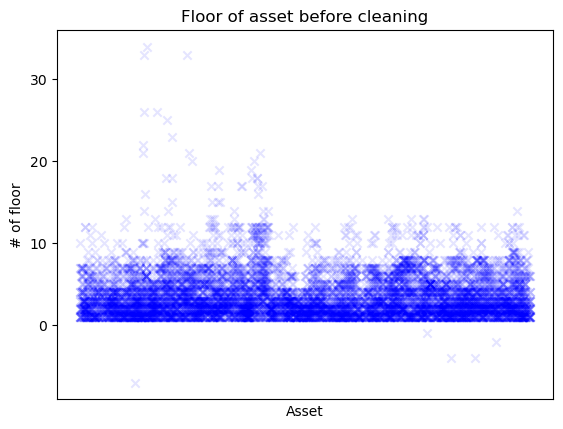

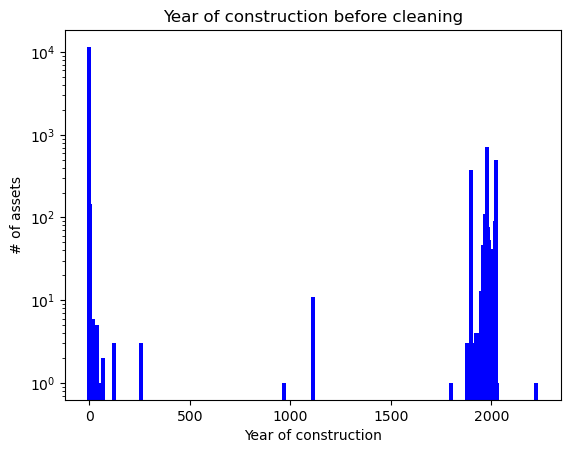

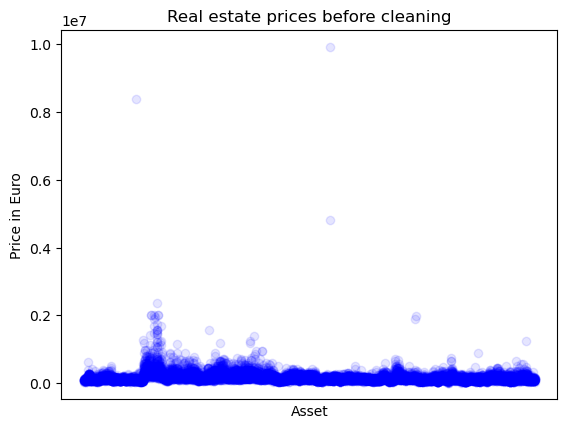

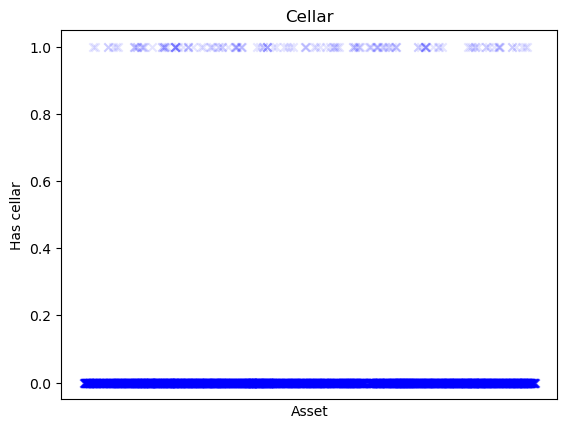

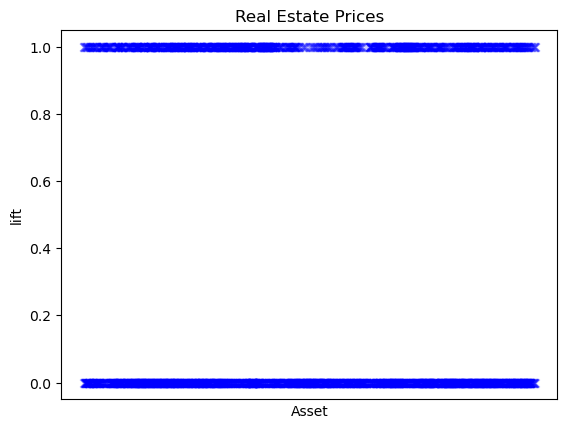

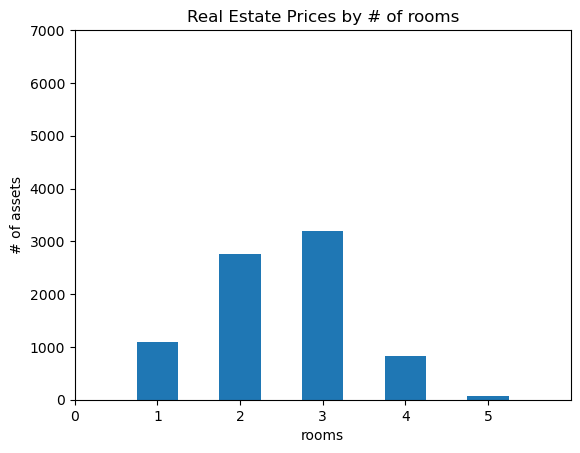

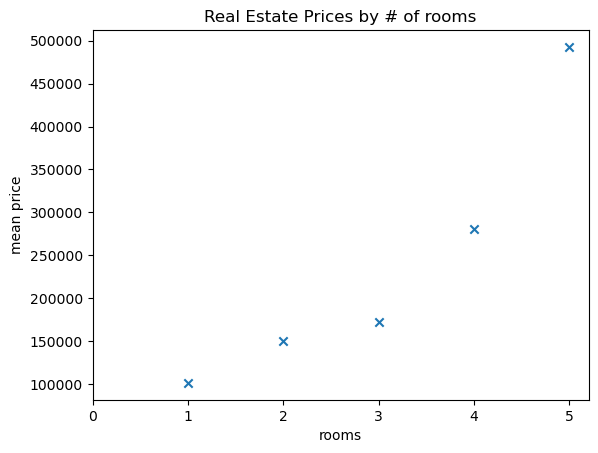

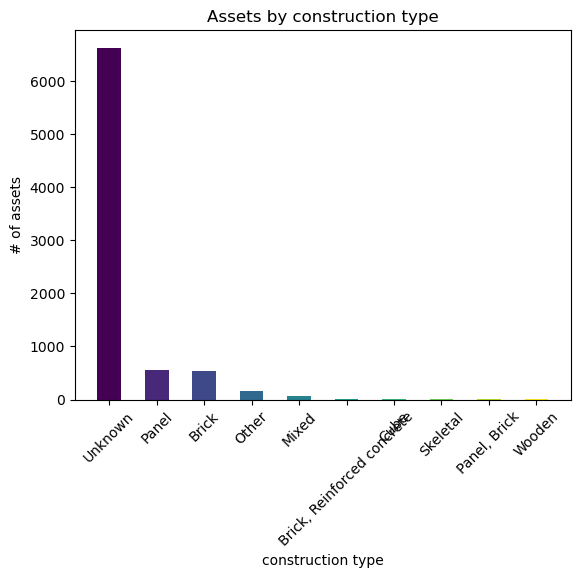

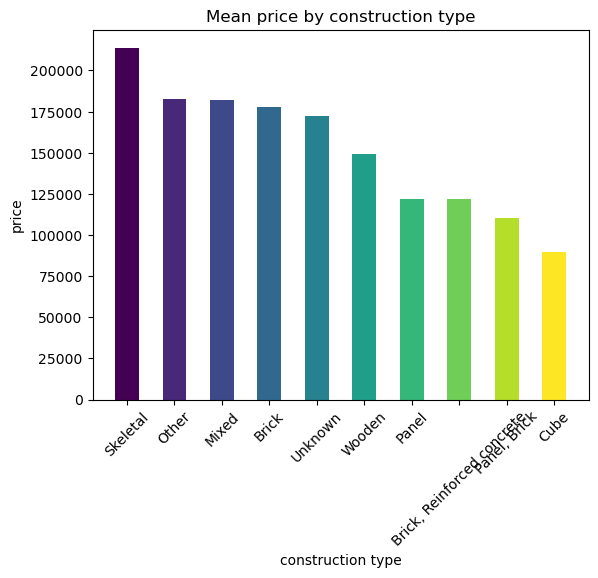

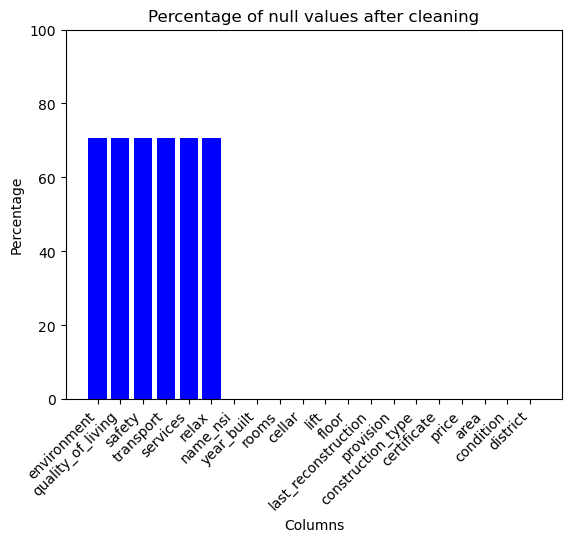

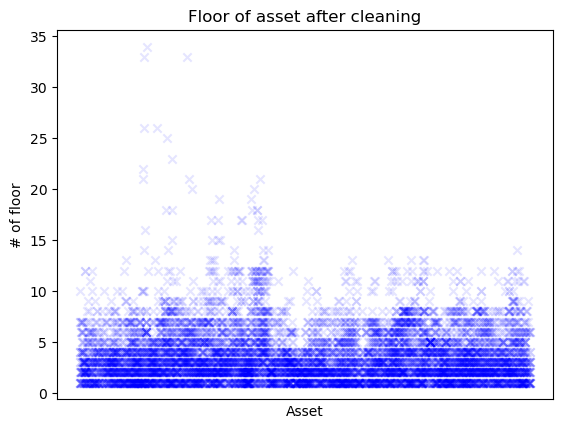

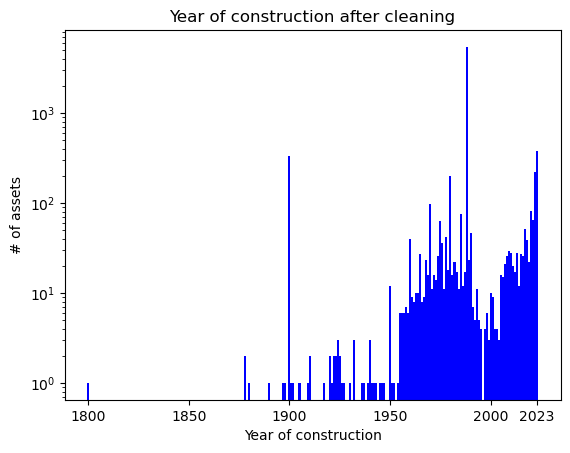

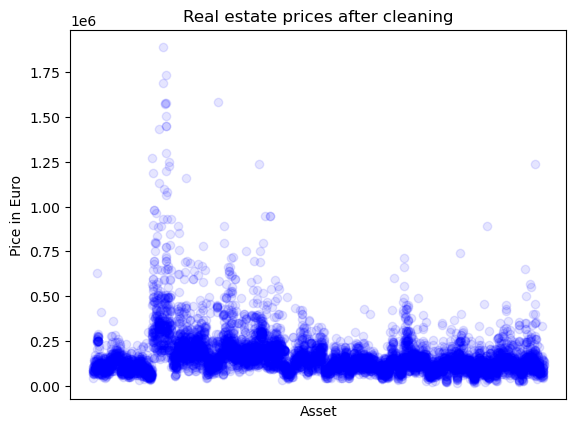

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import sys
import logging
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy as sp 
import sklearn as sl 
import nltk as nl 
 



#get the Python3 version
print("Python: " + str(sys.version))
# Get pandas version
print("pandas: "+ str(pd.__version__))
# numpy version
print("numpy: "+ str(np.__version__))
# matplotlib
print("matplotlib: " + str(plt.__version__))
# scipy
print("scipy: " + str(sp.__version__))
# sklearn 
print("sklearn: " + str(sl.__version__))
#nltk
print("NLTK: " + str(nl.__version__))


# ## Import dataset

# In[4425]:


import pandas as pd


df = pd.read_csv('Real Estate Dataset.csv', sep=';')

df.describe()
df.info()

# Print all the columns of the df
print(df.columns)


# In[4426]:


orientation_count = df.groupby('orientation')['price'].count()
print('Total = ', orientation_count.values.sum())
orientation_count


# ## Visualization before cleaning

import matplotlib.pyplot as plt


df_is_null = df.isnull().sum().sort_values(ascending=False)
# Get the percentage of null values for each feature
null_percentages = (df_is_null / df.shape[0]) * 100

plt.bar(list(null_percentages.index), list(null_percentages.values), color='blue')
plt.title("Percentage of null values before cleaning")
plt.ylabel("Null values in %")
plt.xlabel("Columns")
plt.xticks(rotation=45, ha='right' )
plt.show()

# Floors of assets

plt.scatter( list(df.index), df['floor'], color='blue',marker='x', alpha=0.1)
plt.title("Floor of asset before cleaning")
plt.ylabel("# of floor")
plt.xlabel("Asset")
plt.xticks([])
plt.show()

# Year built

df_yb = df
df_yb['year_built'] = df_yb['year_built'].replace(np.nan, -1)
df_yb_grouped = df_yb.groupby('year_built')['year_built'].count()

plt.bar( list(df_yb_grouped.index[:-1]), list(df_yb_grouped.values[:-1]), 20, color='blue')
plt.title("Year of construction before cleaning")
plt.ylabel("# of assets")
plt.xlabel("Year of construction")
plt.yscale('log')
plt.show()

# Price

plt.scatter( list(df.index), df['price'], color='blue',marker='o', alpha=0.1)
plt.title("Real estate prices before cleaning")
plt.ylabel("Price in Euro")
plt.xlabel("Asset")
plt.xticks([])
plt.show()


# ## Delete duplicates
df.drop_duplicates()


df['condition'].unique()
df['condition'] = df['condition'].replace('New building', 'Original condition')
df['certificate'].unique()
df['construction_type'].unique()

# ## Drop rows where 'price', 'area', 'condition', ' floor' or 'rooms' is null

rows_before = df.shape[0]

df.dropna(axis=0, how='any', subset=['rooms', 'price', 'area', 'condition', 'floor'], inplace=True)

# ## Drop 'orientation', 'energy_costs', 'total_floors', 'balkonies', 'loggia', 'index' cost column because of lack of data

df = df.drop(['orientation', 'energy_costs', 'total_floors', 'balkonies', 'loggia', 'index'], axis=1)


# ## Replace NaN in last_reconstruction and year_built 

df = df.drop(df[((df['year_built'] < 1800) &  (df['year_built'] != -1)) | (df['year_built'] > 2023)].index)
df['year_built'] = df['year_built'].replace(-1, np.nan)
df['year_built'] = df['year_built'].replace(np.nan, df['year_built'].median())

df['last_reconstruction'] = df['last_reconstruction'].fillna(df['year_built'])
df = df.drop(df[df['last_reconstruction'] > 2023].index)
reconstructions = df.groupby(['last_reconstruction'])['last_reconstruction'].count().sort_index(ascending=True)
reconstructions


# ## Replace construction_type, and certificate nulls with 'Unknown'

df['construction_type'] = df['construction_type'].replace(np.nan, 'Unknown')
df['certificate'] = df['certificate'].replace(np.nan, 'Unknown')


# ## Visualize distribution of cellar, lift, 

# cellar

plt.scatter( list(df.index), df['cellar'], color='blue',marker='x', alpha=0.1)
plt.title("Cellar")
plt.ylabel("Has cellar")
plt.xlabel("Asset")
plt.xticks([])
plt.show()

# lift
plt.scatter( list(df.index), df['lift'], color='blue',marker='x', alpha=0.1)
plt.title("Real Estate Prices")
plt.ylabel("lift")
plt.xlabel("Asset")
plt.xticks([])
plt.show()


# Drop where floor is below 0
df = df.drop(df[df['floor'] < 0].index )

# Show the remaining number of null values per column
df.isna().sum()

# Drop where price is 2.000.000 EUR (outliers)

df = df.drop(df[df['price'] > 2000000].index)




# ## check Rooms

rooms = df.groupby('rooms')['rooms'].count()

plt.bar( list(rooms.index), list(rooms.values), .5)
plt.title("Real Estate Prices by # of rooms")
plt.ylabel("# of assets")
plt.xlabel("rooms")
plt.axis([0, 6, 0 , 7000])   
plt.xticks([i for i in range(6)]) 
plt.show()

#Mean price rooms
price_per_rooms = df.groupby('rooms')['price'].mean()
plt.scatter(list(price_per_rooms.index), list(price_per_rooms.values), marker='x')
plt.title("Real Estate Prices by # of rooms")
plt.ylabel("mean price")
plt.xlabel("rooms")
plt.xticks([i for i in range(6)])
plt.show()


# ## Construction type
import numpy as np

construction_type_anmount = df.groupby('construction_type')['construction_type'].count().sort_values(ascending=False)

plt.bar( list(construction_type_anmount.index), list(construction_type_anmount.values), .5, color=plt.get_cmap('viridis')(np.linspace(0,1,construction_type_anmount.shape[0])))
plt.title("Assets by construction type")
plt.ylabel("# of assets")
plt.xlabel("construction type" )
plt.xticks(rotation=45)
plt.show()

construction_type_price = df.groupby('construction_type')['price'].mean().sort_values(ascending=False)
plt.bar( list(construction_type_price.index), list(construction_type_price.values), .5, color=plt.get_cmap('viridis')(np.linspace(0,1,construction_type_anmount.shape[0])))
plt.title("Mean price by construction type")
plt.ylabel("price")
plt.xlabel("construction type" )
plt.xticks(rotation=45)
plt.show()


# ## drop type because of redundancy
df_types = df.groupby(['type','rooms'])['type'].count().sort_values(ascending=False)
df = df.drop('type', axis=1)


# ## Visualization after cleaning

df_is_null = df.isnull().sum().sort_values(ascending=False)

# Get the percentage of null values for each feature
null_percentages = (df_is_null / df.shape[0]) * 100

plt.bar(list(null_percentages.index), list(null_percentages.values), color='blue')
plt.title("Percentage of null values after cleaning")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.xticks(rotation=45, ha='right')
plt.ylim(0,100)
plt.show()

# Floor of assets
plt.scatter( list(df.index), df['floor'], color='blue',marker='x', alpha=0.1)
plt.title("Floor of asset after cleaning")
plt.ylabel("# of floor")
plt.xlabel("Asset")
plt.xticks([])
plt.show()

# Year built
df_yb_grouped = df.groupby('year_built')['year_built'].count()
plt.bar( list(df_yb_grouped.index), list(df_yb_grouped.values), 1, color='blue')
plt.title("Year of construction after cleaning")
plt.ylabel("# of assets")
plt.xlabel("Year of construction")
plt.yscale('log')

array = np.arange(1800, 2001, 50)
array = np.append(array, 2023)
plt.xticks(array)

plt.show()

# Price

plt.scatter( list(df.index), df['price'], color='blue',marker='o', alpha=0.1)
plt.title("Real estate prices after cleaning")
plt.ylabel("Pice in Euro")
plt.xlabel("Asset")
plt.xticks([])
plt.show()

#Prepare data




## Preprocess data

In [2]:
df['lift'].unique()

array([0, 1])

In [3]:
from sklearn.preprocessing import LabelBinarizer

# Generate features
names = df['name_nsi']
feature_name_nsi = names.values.reshape(-1, 1)

one_hot = LabelBinarizer()
df['name_nsi'] = list(one_hot.fit_transform(feature_name_nsi))

district = df['district']
feature_district = district.values.reshape(-1, 1)

one_hot = LabelBinarizer()
df['district'] = list(one_hot.fit_transform(feature_district))



In [4]:
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
minmax_scale = MinMaxScaler(feature_range=(0, 1))
df['price'] = minmax_scale.fit_transform(df['price'].values.reshape(-1, 1))


In [5]:
#map condition
condition_mapper = {'Development project':1,
                    'Under construction':2,
                    'Original condition':3,
                    'Partial reconstruction':4, 
                    'Complete reconstruction':5
                    }

df['condition'] = df['condition'].replace(condition_mapper)

/var/folders/g1/1xt42k0x2tx1bq2jl2pkpglr0000gn/T/ipykernel_81567/1675111892.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['condition'] = df['condition'].replace(condition_mapper)


In [6]:
# Initialize the MinMaxScaler
df['area'] = df['area'].str.replace(',', '.').astype(float)
df['area'] = minmax_scale.fit_transform(df['area'].values.reshape(-1, 1))



In [7]:
# Generate features
certificates_mapper = {'Unknown':1,
                    'none':2,
                    'G':3,
                    'F':4,
                    'E':5,
                    'D':6,
                    'C':7,
                    'B':8,  
                    'A':9 
                    }

df['certificate'] = df['certificate'].replace(certificates_mapper)


/var/folders/g1/1xt42k0x2tx1bq2jl2pkpglr0000gn/T/ipykernel_81567/3785478381.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['certificate'] = df['certificate'].replace(certificates_mapper)


In [8]:
names = df['construction_type']
feature_name_nsi = names.values.reshape(-1, 1)

one_hot = LabelBinarizer()
df['construction_type'] = list(one_hot.fit_transform(feature_name_nsi))

In [9]:
df['year_built'] = df['year_built'].astype(int)
df['year_built'] = minmax_scale.fit_transform(df['year_built'].values.reshape(-1, 1))

df['last_reconstruction'] = df['last_reconstruction'].astype(int)
df['last_reconstruction'] = minmax_scale.fit_transform(df['last_reconstruction'].values.reshape(-1, 1))

df['floor'] = df['floor'].astype(int)
df['floor'] = minmax_scale.fit_transform(df['floor'].values.reshape(-1, 1))

df['rooms'] = df['rooms']
df['rooms'] = minmax_scale.fit_transform(df['rooms'].values.reshape(-1, 1))

In [ ]:
# ## Split data-set

df.to_csv('real_estate_cleaned.csv')

# Drop all where index values is null
df_with_index = df.dropna(axis=0, how='any', subset=['quality_of_living', 'safety', 'transport', 'services', 'relax','environment'], inplace=False)
minmax_scale = MinMaxScaler(feature_range=(0, 1))

columns = ['environment',
           'quality_of_living',
           'safety',
           'transport',	
           'services',	
           'relax']

def reshape_column(df_with_index, minmax_scale, column):
    df_with_index[column] = minmax_scale.fit_transform(df_with_index[column].values.reshape(-1, 1))
    return df_with_index

for column in columns:
    reshape_column(df_with_index, minmax_scale, column)
    print(column)




# df_with_index.to_csv('real_estate_index.csv')
# print(df_with_index)


environment
quality_of_living
safety
transport
services
relax


In [ ]:
# Drop index columns
df_without_index = df.drop(['quality_of_living', 'safety', 'transport', 'services', 'relax','environment'], axis=1)
# df_without_index.to_csv('real_estate.csv')